In [25]:
import matplotlib.pyplot as plt
import sys
import time
import scipy.io as io
import os
from os import listdir
import glob
import time

import csv
import cv2
import numpy as np
from opt_flow import draw_flow

import math
from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import binary_closing, binary_opening, binary_dilation, disk,remove_small_objects,label,binary_erosion
from skimage.color import label2rgb

from scipy.signal import find_peaks

RootPath = 'Y:\\RDRU_MYBPC3_2021\\Pilot20211011\\IPSC_Plate2\\211011_Brandon_IPSC_Plate2_s15'
OutputPath = 'Y:\\RDRU_MYBPC3_2021\\Pilot20211011_plate2_output\\Plate2_s15'

# Create target Directory if don't exist
if not os.path.exists(OutputPath):
    os.mkdir(OutputPath)
    print("Directory " , OutputPath ,  " Created ")
else:    
    print("Directory " , OutputPath ,  " already exists")

#subdirectories = os.listdir(RootPath)
#videoNames = listdir(RootPath)
videoNames = sorted(listdir(RootPath))

ds =2

Directory  Y:\RDRU_MYBPC3_2021\Pilot20211011_plate2_output\Plate2_s15  already exists


In [26]:
print(videoNames)
subfolder = RootPath
imageNameRoot =  subfolder  + "\\tiff\\*.tif"
        #B9, C2,C4
(dirName,videoFileName) = os.path.split(subfolder)

imageNameRoot0 = dirName
imageNames = sorted(glob.glob(imageNameRoot))
imageNum = len(imageNames)
print(imageNames[0])
print('subfolder: ' + subfolder)
print('ImageName: ' + str(imageNum))
print('videoName: '+ str(videoFileName))

['211011_Brandon_IPSC_Plate2_s15_video_ds.avi', 'frame_001.tif.tif', 'tiff']
Y:\RDRU_MYBPC3_2021\Pilot20211011\IPSC_Plate2\211011_Brandon_IPSC_Plate2_s15\tiff\211011_Brandon_IPSC_Plate2_s15_frame_001.tif.tif
subfolder: Y:\RDRU_MYBPC3_2021\Pilot20211011\IPSC_Plate2\211011_Brandon_IPSC_Plate2_s15
ImageName: 960
videoName: 211011_Brandon_IPSC_Plate2_s15


In [27]:
img0 = cv2.imread(imageNames[0])
######frame10 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
######
######ret, frame10 = cap.read()
frame1 = img0[::ds,::ds,:]
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255


## Specify output
tmp = videoNames[0]
outputFolder = OutputPath+ "\\" + tmp[:-4]

print('outputFolder: ' + outputFolder)
print(outputFolder)
    # Create target Directory if don't exist
if not os.path.exists(outputFolder):
    os.mkdir(outputFolder)
    print("Directory " , outputFolder ,  " Created ")
else:    
    print("Directory " , outputFolder ,  " already exists")


videoOut = outputFolder+'\\' + videoFileName[:-4] + '_opticalFlow.avi'
print('videoOut: '+ videoOut)

fps = 100
hei, wid = prvs.shape
fourcc = cv2.VideoWriter_fourcc(*'XVID')
VideoOutput = cv2.VideoWriter(videoOut, fourcc, fps, (2*wid,hei))

magStack = np.zeros([hei, wid, int(imageNum)-1],dtype =  np.float32)
angStack = np.zeros([hei, wid, int(imageNum)-1],dtype =  np.float32)

outputFolder: Y:\RDRU_MYBPC3_2021\Pilot20211011_plate2_output\Plate2_s15\211011_Brandon_IPSC_Plate2_s15_video_ds
Y:\RDRU_MYBPC3_2021\Pilot20211011_plate2_output\Plate2_s15\211011_Brandon_IPSC_Plate2_s15_video_ds
Directory  Y:\RDRU_MYBPC3_2021\Pilot20211011_plate2_output\Plate2_s15\211011_Brandon_IPSC_Plate2_s15_video_ds  already exists
videoOut: Y:\RDRU_MYBPC3_2021\Pilot20211011_plate2_output\Plate2_s15\211011_Brandon_IPSC_Plate2_s15_video_ds\211011_Brandon_IPSC_Plate2_opticalFlow.avi


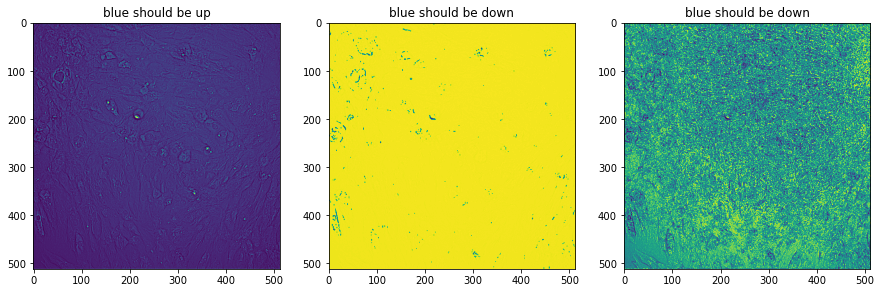

In [28]:
from skimage import exposure

gamma_corrected = exposure.adjust_gamma(prvs, .01)
logarithmic_corrected = exposure.adjust_log(prvs, 5)

fig, axs = plt.subplots(1,3, figsize=(15, 5))
axs[0].set_title('blue should be up')
axs[0].imshow(prvs)

axs[1].set_title('blue should be down')
axs[1].imshow(gamma_corrected)

axs[2].set_title('blue should be down')
axs[2].imshow(logarithmic_corrected)


plt.show()



In [39]:
###VideoOutput = cv2.VideoWriter(videoOut, fourcc, fps, (2*wid,hei))
from skimage.filters import gaussian
for ii in range(0,imageNum-1):

    img2 = cv2.imread(imageNames[ii])
    frame2 = img2[::ds,::ds,:]
    next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    ###prvs_s = gaussian(prvs, sigma = 1)
    ###next_s = gaussian(next, sigma = 1)
    
    prvs_s = prvs
    next_s = next
    ##prvs_s = exposure.adjust_gamma(prvs_s, 1)
    ##next_s = exposure.adjust_gamma(next_s, 1)
    
    ##prvs_s = exposure.adjust_log(prvs, 5)
    ##next_s = exposure.adjust_log(next, 5)
    
    ###flow_d = next_s-prvs_s
    flow = cv2.calcOpticalFlowFarneback(prvs_s,next_s, None, .5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    hsv[...,2] = mag*10
    #print(np.max(mag))
    ###bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
    ###vis = draw_flow(next_s, flow*10)

    magStack[:,:,ii] = mag
    ###angStack[:,:,ii] = ang
    #bgr = np.concatenate((frame2,bgr),axis=1)
    #bgr = np.concatenate((bgr,vis),axis=1)

    #cv2.imshow('frame2',bgr)
    #k = cv2.waitKey(30) & 0xff
    #if k == 27:
    #    break
    #elif k == ord('s'):
    #    cv2.imwrite('opticalfb.png',frame2)
    #    cv2.imwrite('opticalhsv.png',bgr)

    if ii%100==0:
        print(ii)

    prvs = next

    ###frame_final = np.concatenate((bgr,vis),axis=1)
    ###VideoOutput.write(frame_final)
    
###VideoOutput.release() 

0
100
200
300
400
500
600
700
800
900


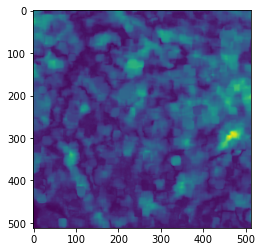

In [40]:
magSum = np.max(magStack,axis=2)
plt.imshow(magSum)

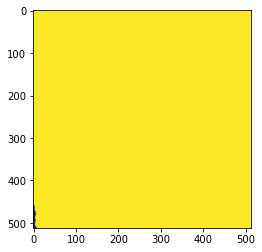

In [42]:
thresh = threshold_otsu(magSum)
mask = magSum>thresh/20
mask_label = label(mask)
###mask = mask_label==5
plt.imshow(mask)

In [43]:
print(magStack.shape[2])
mask_stack = np.repeat(mask[:, :, np.newaxis], magStack.shape[2], axis=2)
print(mask_stack.shape)

959
(512, 512, 959)


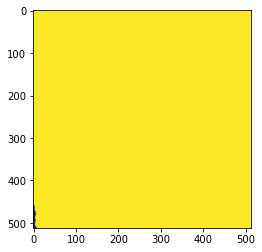

In [44]:
plt.imshow(mask_stack[:,:,200])

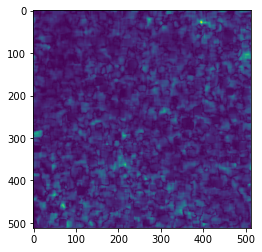

In [45]:
plt.imshow(magStack[:,:,200])

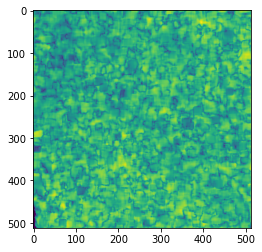

In [46]:
magStack_mask = np.multiply(magStack, mask_stack.astype(int))
plt.imshow(np.log(magStack_mask[:,:,200]+0.001))

In [47]:
diff_t = np.max(magStack_mask,axis=0)
diff_t = np.max(diff_t,axis=0)
print(diff_t.shape)

(959,)


In [48]:
diff_t = np.percentile(magStack_mask,95,axis=0)
diff_t = np.percentile(diff_t,95,axis=0)
print(diff_t.shape)

(959,)


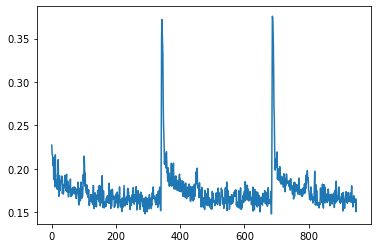

In [49]:
plt.plot(diff_t[1:950])

In [ ]:

power = np.abs(np.fft.fft(diff_t-np.mean(diff_t)))**2
len1 = len(power)//2
power = power[1:len1]

maxHeight_freq = np.max(power)

peaks_freq, _ = find_peaks(power, height= maxHeight_freq/9,distance=3)

freq = np.linspace(0, fps/2, len(power)) 


plt.plot(freq[1:],(power[1:]))
plt.plot(freq[peaks_freq],power[peaks_freq], "o")    # shift due to the direct component  
plt.xlabel('Frequency (Hz)')
print(freq[peaks_freq])

In [ ]:
from scipy import signal
sos = signal.butter(25, [0.1, 2], 'bandpass', fs=100, output='sos')
filtered = signal.sosfilt(sos, diff_t)
plt.plot(filtered)

In [ ]:
img = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(img)

In [ ]:
sampleImgName = outputFolder+'\\' + videoFileName[:-4]+"_sample.tif"
print('sampleImgName: ' + sampleImgName)
plt.savefig(sampleImgName)

magSum = np.max(magStack,axis=2)
plt.rcParams['figure.figsize'] = [8, 8]

plt.imshow(magSum)
plt.title('max: ' + str(round(np.max(magSum)*1000)/1000) + ' min: ' + str(round(np.min(magSum)*1000)/1000))

heatMapImgName = outputFolder+'\\' + videoFileName[:-4]+"_heatmap.tif"
plt.savefig(heatMapImgName)
    
    

In [ ]:
 # apply threshold

thresh = threshold_otsu(magSum)

print(thresh)
print(np.max(magSum))
print(np.min(magSum))
bw = (magSum>thresh)

###bw = binary_erosion(bw,disk(25))
###bw = binary_dilation(bw,disk(25))
###bw = binary_opening(magSum>thresh, disk(25))
#bw = clear_border(bw)
###bw = remove_small_objects(bw,500)
#bw = clear_border(bw)
#bw = binary_closing(bw,disk(3))

bw = 1-bw
bwlabel = label(bw)
plt.rcParams['figure.figsize'] = [8, 8]
plt.imshow(bwlabel)
print(np.max(bwlabel))

In [ ]:
magMask = (bwlabel>0)
magMask = binary_dilation(magMask,disk(9))

plt.rcParams['figure.figsize'] = [16, 18]
fig, ax = plt.subplots()
#plt.subplot(311)
#plt.imshow(magMask)
#plt.subplot(312)
#plt.imshow(img)

alpha = 1
img_hsv = color.rgb2hsv(frame1)
color_mask = np.zeros(frame1.shape)
color_mask[...,0] = magMask.astype(float)*255
color_mask[...,1] = magMask.astype(float)*255
#color_mask[...,2] = magMask.astype(np.float)*255
color_mask_hsv = color.rgb2hsv(color_mask)

img_hsv[..., 0] = color_mask_hsv[..., 0]
img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha
img_masked = color.hsv2rgb(img_hsv)

plt.subplot(311)
plt.imshow(img_masked)

In [ ]:
regionSize = np.sum(magMask)
magStackRegion = np.zeros(magStack.shape,dtype=float)
for ii in range(magStack.shape[2]):
    magStackRegion[:,:,ii] = magStack[:,:,ii]*magMask

### One dimenstional signal
magTimeRegion = np.sum(magStackRegion,axis=1)  
magTimeRegion = np.sum(magTimeRegion,axis=0)
magTimeRegion = magTimeRegion/regionSize

###magTimeRegion = np.max(magStackRegion,axis=1)  
###magTimeRegion = np.max(magTimeRegion,axis=0)


maxHeight = np.max(magTimeRegion)
peaks, _ = find_peaks(magTimeRegion, height= maxHeight/6,distance=3)

time_ticks = np.array(range(len(magTimeRegion)))/fps
plt.subplot(312)
plt.plot(time_ticks,magTimeRegion) 
plt.plot(time_ticks[peaks],magTimeRegion[peaks], "o")      
plt.xlabel('time (s)')


spike_mean = np.mean(magTimeRegion[peaks])
spike_median = np.median(magTimeRegion[peaks])
spike_max = np.max(magTimeRegion[peaks])
spike_std = np.std(magTimeRegion[peaks])

power = np.abs(np.fft.fft(magTimeRegion-np.mean(magTimeRegion)))**2
len1 = len(power)//2
power = power[1:len1]

maxHeight_freq = np.max(power)

peaks_freq, _ = find_peaks(power, height= maxHeight_freq/9,distance=3)

freq = np.linspace(0, fps/2, len(power)) 

plt.subplot(313)
plt.plot(freq[1:],(power[1:]))
plt.plot(freq[peaks_freq],power[peaks_freq], "o")    # shift due to the direct component  
plt.xlabel('Frequency (Hz)')

freqCom = freq[peaks_freq]
freqCom = freqCom[freqCom<10.0]
fc = [-10,-10,-10]
if len(freqCom)>0:
    for ii in range(len(freqCom)):
        fc[ii] = freqCom[ii]

quantImageName = outputFolder+'\\' + videoFileName[:-4]+"_region_" + str(kk) +".tif"
plt.savefig(quantImageName)

#  csvWriter.writerow(['videoName','region_number','spike_mean','spike_std','freqCom1','freqCom2','feqCom3'])
print("Writing csv...")
csvWriter.writerow((videoFileName[:-4], kk, spike_mean, spike_median,spike_max,spike_std,fc[0],fc[1],fc[2]))
print("Finished writing csv")

In [ ]:
heatMapRegionName = outputFolder+'\\' + videoFileName[:-4]+"_activeRegion.tif"
plt.savefig(heatMapRegionName)
#print(np.max(bwlabel))
#regionSize= np.sum(bw)

### csv OUTPUT
###
csvOut = outputFolder+"\\" + videoFileName[:-4] + "_out.csv"
fout = open(csvOut, 'w',newline='')
csvWriter = csv.writer(fout)

# with open(csvOut, 'w', newline='') as outfile:
#     csvWriter = csv.writer(outfile)

In [ ]:
csvWriter.writerow(['videoName','region_number','spike_mean','spike_median','spike_max','spike_std','freq_com1','freq_com2','freq_com3'])

In [ ]:
from skimage import data, color, io, img_as_float

###for kk in range(1,np.max(bwlabel)+1):
for kk in range(0,1):
    magMask = (bwlabel==kk)
    magMask = binary_dilation(magMask,disk(9))

    plt.rcParams['figure.figsize'] = [16, 18]
    fig, ax = plt.subplots()
    #plt.subplot(311)
    #plt.imshow(magMask)
    #plt.subplot(312)
    #plt.imshow(img)

    alpha = 0.8
    img_hsv = color.rgb2hsv(frame1)
    color_mask = np.zeros(frame1.shape)
    color_mask[...,0] = magMask.astype(float)*255
    color_mask[...,1] = magMask.astype(float)*255
    #color_mask[...,2] = magMask.astype(np.float)*255
    color_mask_hsv = color.rgb2hsv(color_mask)

    img_hsv[..., 0] = color_mask_hsv[..., 0]
    img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha
    img_masked = color.hsv2rgb(img_hsv)

    plt.subplot(311)
    plt.imshow(img_masked)

    regionSize = np.sum(magMask)
    magStackRegion = np.zeros(magStack.shape,dtype=float)
    for ii in range(magStack.shape[2]):
        magStackRegion[:,:,ii] = magStack[:,:,ii]*magMask

    ### One dimenstional signal
    magTimeRegion = np.sum(magStackRegion,axis=1)  
    magTimeRegion = np.sum(magTimeRegion,axis=0)
    magTimeRegion = magTimeRegion/regionSize

    ###magTimeRegion = np.max(magStackRegion,axis=1)  
    ###magTimeRegion = np.max(magTimeRegion,axis=0)


    maxHeight = np.max(magTimeRegion)
    peaks, _ = find_peaks(magTimeRegion, height= maxHeight/6,distance=3)

    time_ticks = np.array(range(len(magTimeRegion)))/fps
    plt.subplot(312)
    plt.plot(time_ticks,magTimeRegion) 
    plt.plot(time_ticks[peaks],magTimeRegion[peaks], "o")      
    plt.xlabel('time (s)')


    spike_mean = np.mean(magTimeRegion[peaks])
    spike_median = np.median(magTimeRegion[peaks])
    spike_max = np.max(magTimeRegion[peaks])
    spike_std = np.std(magTimeRegion[peaks])

    power = np.abs(np.fft.fft(magTimeRegion-np.mean(magTimeRegion)))**2
    len1 = len(power)//2
    power = power[1:len1]

    maxHeight_freq = np.max(power)

    peaks_freq, _ = find_peaks(power, height= maxHeight_freq/9,distance=3)

    freq = np.linspace(0, fps/2, len(power)) 

    plt.subplot(313)
    plt.plot(freq[1:],(power[1:]))
    plt.plot(freq[peaks_freq],power[peaks_freq], "o")    # shift due to the direct component  
    plt.xlabel('Frequency (Hz)')

    freqCom = freq[peaks_freq]
    freqCom = freqCom[freqCom<10.0]
    fc = [-10,-10,-10]
    if len(freqCom)>0:
        for ii in range(len(freqCom)):
            fc[ii] = freqCom[ii]

    quantImageName = outputFolder+'\\' + videoFileName[:-4]+"_region_" + str(kk) +".tif"
    plt.savefig(quantImageName)

    #  csvWriter.writerow(['videoName','region_number','spike_mean','spike_std','freqCom1','freqCom2','feqCom3'])
    print("Writing csv...")
    csvWriter.writerow((videoFileName[:-4], kk, spike_mean, spike_median,spike_max,spike_std,fc[0],fc[1],fc[2]))
    print("Finished writing csv")

fout.close()

In [ ]:
#for nn in range(0,len(videoNames)):
for nn in range(0,imageNum//2):

    plt.cla() #means clear current axis
    plt.clf() #means clear current figure
    
    videoName = RootPath + "\\"+videoNames[0]
    
    #########cap = cv2.VideoCapture(videoName)

    (dirName,videoFileName) = os.path.split(videoName)

    ######
  
    img0 = cv2.imread(imageNames[0])
    frame10 = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
    ######
    ######ret, frame10 = cap.read()
    frame1 = frame10[::2,::2,:]
    prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    hsv = np.zeros_like(frame1)
    hsv[...,1] = 255
    ######videoLen = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    videoLen = imageNum
    
    ## Specify output
    tmp = videoNames[nn]
    outputFolder = OutputPath+ "\\" + tmp[:-4]
    print(outputFolder)
        # Create target Directory if don't exist
    if not os.path.exists(outputFolder):
        os.mkdir(outputFolder)
        print("Directory " , outputFolder ,  " Created ")
    else:    
        print("Directory " , outputFolder ,  " already exists")
    
    
    videoOut = outputFolder+'\\' + videoFileName[:-4] + '_opticalFlow.avi'
    print(videoOut)

    fps = 100
    hei, wid = prvs.shape
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    VideoOutput = cv2.VideoWriter(videoOut, fourcc, fps, (2*wid,hei))

    magStack = np.zeros([hei, wid, int(videoLen)-1],dtype =  np.float64)
    angStack = np.zeros([hei, wid, int(videoLen)-1],dtype =  np.float64)

    for ii in range(int(videoLen//2)-1):
        ret, frame20 = cap.read()
        frame2 = frame20[::1,::1,:]
        next = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prvs,next, None, .5, 3, 15, 3, 5, 1.2, 0)

        mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
        hsv[...,0] = ang*180/np.pi/2
        #hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
        hsv[...,2] = mag*26
        #print(np.max(mag))
        bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
        vis = draw_flow(next, flow*36)

        magStack[:,:,ii] = mag
        angStack[:,:,ii] = ang
        #bgr = np.concatenate((frame2,bgr),axis=1)
        #bgr = np.concatenate((bgr,vis),axis=1)

        #cv2.imshow('frame2',bgr)
        #k = cv2.waitKey(30) & 0xff
        #if k == 27:
        #    break
        #elif k == ord('s'):
        #    cv2.imwrite('opticalfb.png',frame2)
        #    cv2.imwrite('opticalhsv.png',bgr)

        if ii%100==0:
            print(ii)

        prvs = next

        frame_final = np.concatenate((bgr,vis),axis=1)
        VideoOutput.write(frame_final)

    VideoOutput.release()    
    cap.release()
    cv2.destroyAllWindows()

    img = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.imshow(img)

    sampleImgName = outputFolder+'\\' + videoFileName[:-4]+"_sample.tif"
    plt.savefig(sampleImgName)

    magSum = np.max(magStack,axis=2)
    plt.rcParams['figure.figsize'] = [8, 8]

    plt.imshow(magSum)
    plt.title('max: ' + str(round(np.max(magSum)*1000)/1000) + ' min: ' + str(round(np.min(magSum)*1000)/1000))

    heatMapImgName = outputFolder+'\\' + videoFileName[:-4]+"_heatmap.tif"
    plt.savefig(heatMapImgName)

    # apply threshold

    thresh = threshold_otsu(magSum)
    print(thresh)
    bw = (magSum>thresh)
    bw = binary_opening(magSum>thresh, disk(25))
    #bw = clear_border(bw)
    bw = remove_small_objects(bw,500)
    #bw = clear_border(bw)
    #bw = binary_closing(bw,disk(3))

    bwlabel = label(bw)
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.imshow(bwlabel)

    heatMapRegionName = outputFolder+'\\' + videoFileName[:-4]+"_activeRegion.tif"
    plt.savefig(heatMapRegionName)
    #print(np.max(bwlabel))
    #regionSize= np.sum(bw)
    
    ### csv OUTPUT
    ###
    csvOut = outputFolder+"\\" + videoFileName[:-4] + "_out.csv"
    fout = open(csvOut, 'w',newline='')
    csvWriter = csv.writer(fout)
    
   # with open(csvOut, 'w', newline='') as outfile:
   #     csvWriter = csv.writer(outfile)
    
    csvWriter.writerow(['videoName','region_number','spike_mean','spike_median','spike_max','spike_std','freq_com1','freq_com2','freq_com3'])
    ###
    ###

In [ ]:
    from skimage import data, color, io, img_as_float

    ###for kk in range(1,np.max(bwlabel)+1):
    for kk in range(0,1):
        magMask = (bwlabel==kk)
        magMask = binary_dilation(magMask,disk(9))

        plt.rcParams['figure.figsize'] = [16, 18]
        fig, ax = plt.subplots()
        #plt.subplot(311)
        #plt.imshow(magMask)
        #plt.subplot(312)
        #plt.imshow(img)

        alpha = 0.8
        img_hsv = color.rgb2hsv(frame1)
        color_mask = np.zeros(frame1.shape)
        color_mask[...,0] = magMask.astype(float)*255
        color_mask[...,1] = magMask.astype(float)*255
        #color_mask[...,2] = magMask.astype(np.float)*255
        color_mask_hsv = color.rgb2hsv(color_mask)

        img_hsv[..., 0] = color_mask_hsv[..., 0]
        img_hsv[..., 1] = color_mask_hsv[..., 1] * alpha
        img_masked = color.hsv2rgb(img_hsv)

        plt.subplot(311)
        plt.imshow(img_masked)

        regionSize = np.sum(magMask)
        magStackRegion = np.zeros(magStack.shape,dtype=float)
        for ii in range(magStack.shape[2]):
            magStackRegion[:,:,ii] = magStack[:,:,ii]*magMask

        ### One dimenstional signal
        magTimeRegion = np.sum(magStackRegion,axis=1)  
        magTimeRegion = np.sum(magTimeRegion,axis=0)
        magTimeRegion = magTimeRegion/regionSize
        
        ###magTimeRegion = np.max(magStackRegion,axis=1)  
        ###magTimeRegion = np.max(magTimeRegion,axis=0)
        
        
        maxHeight = np.max(magTimeRegion)
        peaks, _ = find_peaks(magTimeRegion, height= maxHeight/6,distance=3)
        
        time_ticks = np.array(range(len(magTimeRegion)))/fps
        plt.subplot(312)
        plt.plot(time_ticks,magTimeRegion) 
        plt.plot(time_ticks[peaks],magTimeRegion[peaks], "o")      
        plt.xlabel('time (s)')
        
        
        spike_mean = np.mean(magTimeRegion[peaks])
        spike_median = np.median(magTimeRegion[peaks])
        spike_max = np.max(magTimeRegion[peaks])
        spike_std = np.std(magTimeRegion[peaks])

        power = np.abs(np.fft.fft(magTimeRegion-np.mean(magTimeRegion)))**2
        len1 = len(power)//2
        power = power[1:len1]
        
        maxHeight_freq = np.max(power)
        
        peaks_freq, _ = find_peaks(power, height= maxHeight_freq/9,distance=3)
        
        freq = np.linspace(0, fps/2, len(power)) 
        
        plt.subplot(313)
        plt.plot(freq[1:],(power[1:]))
        plt.plot(freq[peaks_freq],power[peaks_freq], "o")    # shift due to the direct component  
        plt.xlabel('Frequency (Hz)')

        freqCom = freq[peaks_freq]
        freqCom = freqCom[freqCom<10.0]
        fc = [-10,-10,-10]
        if len(freqCom)>0:
            for ii in range(len(freqCom)):
                fc[ii] = freqCom[ii]
               
        quantImageName = outputFolder+'\\' + videoFileName[:-4]+"_region_" + str(kk) +".tif"
        plt.savefig(quantImageName)
        
        #  csvWriter.writerow(['videoName','region_number','spike_mean','spike_std','freqCom1','freqCom2','feqCom3'])
        print("Writing csv...")
        csvWriter.writerow((videoFileName[:-4], kk, spike_mean, spike_median,spike_max,spike_std,fc[0],fc[1],fc[2]))
        print("Finished writing csv")
        
    fout.close()